# Trovato Final Project - News API Sentiment Analysis Tool
The purpose of the project is to analyse news articles around a topic of the users choice and understand changes in sentiment over time using TextBlob sentiment tools



# News API

Info on NewsAPI: https://newsapi.org/

All included news sources: https://newsapi.org/sources

Info on TextBlob: https://textblob.readthedocs.io/en/dev/

Info on Scrapy: https://scrapy.org/


# Part 1: Top Articles on a Topic for top news sites using news API

1. Make an API call for NewsAPI to top articles on the word Trump

2. Add articles into a DataFrame

In [1]:
#Importing pandas
import pandas as pd

In [2]:
#Importing requests, which allows me to make an API call
import requests

In [3]:
#Calling the NewsAPI.org on a certain date, for the topic "Trump" (but could be used for any topic)
apiKey = '44406889b86044379c6c94b01ac01508'
api_url_base = 'https://newsapi.org/v2/everything?'
topic = 'Trump'

headers = {'q': topic, 'from': '2018-09-10', 'sortBy': 'popularity', 'apiKey': apiKey}

r = requests.get(api_url_base, headers)
x = r.json()
top_articles = pd.DataFrame(x['articles'])
top_articles.head(5)

,author,content,description,publishedAt,source,title,url,urlToImage
0,"Kinja! on Kinja Roundup, shared by Virginia K....",None,Deadspin Listen To Earl Thomas | The A.V. Club...,2018-09-24T13:54:00Z,"{'id': None, 'name': 'Kinja.com'}",Deadspin Listen To Earl Thomas | The A.V.,https://kinjaroundup.kinja.com/deadspin-listen...,https://i.kinja-img.com/gawker-media/image/upl...
1,"Kinja! on Kinja Roundup, shared by Alice Bradl...",None,Deadspin The Jets Say They Knew Everything The...,2018-09-11T14:21:00Z,"{'id': None, 'name': 'Kinja.com'}",Deadspin The Jets Say They Knew Everything The...,https://kinjaroundup.kinja.com/deadspin-the-je...,https://i.kinja-img.com/gawker-media/image/upl...
2,Leigh Anderson,The news cycle is enough to make you lose hope...,The news cycle is enough to make you lose hope...,2018-09-25T19:30:00Z,"{'id': None, 'name': 'Lifehacker.com'}",How to Stay Politically Active When You Just C...,https://lifehacker.com/how-to-stay-politically...,https://i.kinja-img.com/gawker-media/image/upl...
3,Jon Fingas,It's not certain when this satellite might dep...,The current White House doesn't accept climate...,2018-09-17T03:58:00Z,"{'id': 'engadget', 'name': 'Engadget'}",California plans to launch its own climate sat...,https://www.engadget.com/2018/09/16/california...,https://o.aolcdn.com/images/dims?thumbnail=120...
4,Steve Dent,"Leica lenses are already available, but those ...","Following the launch of the L-Mount alliance, ...",2018-09-25T11:01:00Z,"{'id': 'engadget', 'name': 'Engadget'}",Panasonic announces two full-frame L-Mount mir...,https://www.engadget.com/2018/09/25/panasonic-...,https://o.aolcdn.com/images/dims?thumbnail=120...


In [4]:
#Pretty straightforward data - it doesn't immediately look like there is anything missing or in error
top_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
author         20 non-null object
content        18 non-null object
description    20 non-null object
publishedAt    20 non-null object
source         20 non-null object
title          20 non-null object
url            20 non-null object
urlToImage     20 non-null object
dtypes: object(8)
memory usage: 1.3+ KB


In [5]:
top_articles.head()

,author,content,description,publishedAt,source,title,url,urlToImage
0,"Kinja! on Kinja Roundup, shared by Virginia K....",None,Deadspin Listen To Earl Thomas | The A.V. Club...,2018-09-24T13:54:00Z,"{'id': None, 'name': 'Kinja.com'}",Deadspin Listen To Earl Thomas | The A.V.,https://kinjaroundup.kinja.com/deadspin-listen...,https://i.kinja-img.com/gawker-media/image/upl...
1,"Kinja! on Kinja Roundup, shared by Alice Bradl...",None,Deadspin The Jets Say They Knew Everything The...,2018-09-11T14:21:00Z,"{'id': None, 'name': 'Kinja.com'}",Deadspin The Jets Say They Knew Everything The...,https://kinjaroundup.kinja.com/deadspin-the-je...,https://i.kinja-img.com/gawker-media/image/upl...
2,Leigh Anderson,The news cycle is enough to make you lose hope...,The news cycle is enough to make you lose hope...,2018-09-25T19:30:00Z,"{'id': None, 'name': 'Lifehacker.com'}",How to Stay Politically Active When You Just C...,https://lifehacker.com/how-to-stay-politically...,https://i.kinja-img.com/gawker-media/image/upl...
3,Jon Fingas,It's not certain when this satellite might dep...,The current White House doesn't accept climate...,2018-09-17T03:58:00Z,"{'id': 'engadget', 'name': 'Engadget'}",California plans to launch its own climate sat...,https://www.engadget.com/2018/09/16/california...,https://o.aolcdn.com/images/dims?thumbnail=120...
4,Steve Dent,"Leica lenses are already available, but those ...","Following the launch of the L-Mount alliance, ...",2018-09-25T11:01:00Z,"{'id': 'engadget', 'name': 'Engadget'}",Panasonic announces two full-frame L-Mount mir...,https://www.engadget.com/2018/09/25/panasonic-...,https://o.aolcdn.com/images/dims?thumbnail=120...


In [6]:
#Pull a list of all general news sources within the US and Engligh NewsAPI
r = requests.get('https://newsapi.org/v2/sources?language=en&country=us&category=general&apiKey=44406889b86044379c6c94b01ac01508')
sources = r.json()
allsources = pd.DataFrame(sources['sources'])
allsources.head(5)

,category,country,description,id,language,name,url
0,general,us,"Your trusted source for breaking news, analysi...",abc-news,en,ABC News,https://abcnews.go.com
1,general,us,"News, analysis from the Middle East and worldw...",al-jazeera-english,en,Al Jazeera English,http://www.aljazeera.com
2,general,us,The AP delivers in-depth coverage on the inter...,associated-press,en,Associated Press,https://apnews.com/
3,general,us,Axios are a new media company delivering vital...,axios,en,Axios,https://www.axios.com
4,general,us,Syndicated news and opinion website providing ...,breitbart-news,en,Breitbart News,http://www.breitbart.com


# Part 2: Sentiment Analysis on NewsAPI top articles with TextBlob
Looking at the top 20 articles most popular articles containing "Trump" in the description, what is the positive or negative sentiment polarity

In [23]:
#Importing data packages
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from textblob import TextBlob

In [8]:
#First I need to convert my dataframe to a bag of words
toptext = pd.DataFrame.to_string(top_articles)

In [9]:
#Toptext is now a bag of words containing all of the top 20 news articles containing the word Trump
toptext[0:1000]

"                                               author                                            content                                        description           publishedAt                                      source                                              title                                                url                                         urlToImage\n0   Kinja! on Kinja Roundup, shared by Virginia K....                                               None  Deadspin\xa0Listen To Earl Thomas | The A.V. Club...  2018-09-24T13:54:00Z           {'id': None, 'name': 'Kinja.com'}          Deadspin Listen To Earl Thomas | The A.V.  https://kinjaroundup.kinja.com/deadspin-listen...  https://i.kinja-img.com/gawker-media/image/upl...\n1   Kinja! on Kinja Roundup, shared by Alice Bradl...                                               None  Deadspin\xa0The Jets Say They Knew Everything The...  2018-09-11T14:21:00Z           {'id': None, 'name': 'Kinja.com'}  Deadspin The Jets 

In [10]:
#Using TextBlob to find the sentiment polarity
analysis = TextBlob(toptext)
pos_or_neg = analysis.sentiment.polarity
pos_or_neg

0.066643475572047

# Part 3: Sentiment over time

1. Create a dataframe with a bag of words for each date

2. Find the sentiment of each bag of words

3. Add each bag of words date/sentiment as a row in a dataframe for each date

4. Plot sentiment over time

In [12]:
#In case you need to clear/ re-run sentiment analysis
#del sentiment_30days

In [13]:
sentiment_30days = pd.DataFrame(columns=['date','sentiment'])

In [14]:
api_url_base = 'https://newsapi.org/v2/everything?'
topic = 'Trump'
startDate = '2018-08-25'

headers = {'q': topic, 'from': startDate, 'sortBy': 'popularity', 'apiKey': apiKey}

r = requests.get(api_url_base, headers)
x = r.json()
top_articles = pd.DataFrame(x['articles'])
toptext = pd.DataFrame.to_string(top_articles)
analysis = TextBlob(toptext)
pos_or_neg = analysis.sentiment.polarity
date = startDate
print(date,": ", pos_or_neg)

2018-08-25 :  0.16189013689013687


In [15]:
sentiment_30days.loc[0] = (date, pos_or_neg)
sentiment_30days

,date,sentiment
0,2018-08-25,0.16189


In [20]:
import datetime
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [17]:
senty30 = pd.DataFrame(columns=['date','sentiment'])

In [25]:
#creating a function to build the sentiment table over time and plot the results, though not elegantly
senty30['date'] = pd.to_datetime(senty30['date'])
apiKey = '44406889b86044379c6c94b01ac01508'

def senty(topic):
    api_url_base = 'https://newsapi.org/v2/everything?'
    start_date = datetime.date( year = 2018, month = 8, day = 25 )
    end_date = datetime.date( year = 2018, month = 9, day = 24 )
 
    list = []
 
    if start_date < end_date:
        for n in range( ( end_date - start_date ).days + 1 ):
            list.append( start_date + datetime.timedelta( n ) )
    else:
        for n in range( ( start_date - end_date ).days + 1 ):
            list.append( start_date - datetime.timedelta( n ) )
    
    for d in list:
        print(d)
    
        headers = {'q': topic, 'from': d, 'sortBy': 'popularity', 'apiKey': apiKey}
        r = requests.get(api_url_base, headers)
        x = r.json()
        top_articles = pd.DataFrame(x['articles'])
        toptext = pd.DataFrame.to_string(top_articles)
        analysis = TextBlob(toptext)
        pos_or_neg = analysis.sentiment.polarity
        date = d
        senty30.loc[d] = (date, pos_or_neg)
    print(senty30)
    
    #Plotting the sentiment over the past 30 days
    plt.rcParams["figure.figsize"] = [16,9]
    plt.ylim(-0.3, 0.3)
    ax = senty30['sentiment'].plot(title = "Sentiment Analysis over the past 30 days")
    ax.set_xlabel("date")
    ax.set_ylabel("sentiment")

2018-08-25
2018-08-26
2018-08-27
2018-08-28
2018-08-29
2018-08-30
2018-08-31
2018-09-01
2018-09-02
2018-09-03
2018-09-04
2018-09-05
2018-09-06
2018-09-07
2018-09-08
2018-09-09
2018-09-10
2018-09-11
2018-09-12
2018-09-13
2018-09-14
2018-09-15
2018-09-16
2018-09-17
2018-09-18
2018-09-19
2018-09-20
2018-09-21
2018-09-22
2018-09-23
2018-09-24
                 date  sentiment
2018-08-25 2018-08-25   0.161890
2018-08-26 2018-08-26   0.161890
2018-08-27 2018-08-27   0.145427
2018-08-28 2018-08-28   0.145427
2018-08-29 2018-08-29   0.098123
2018-08-30 2018-08-30   0.095187
2018-08-31 2018-08-31   0.110812
2018-09-01 2018-09-01   0.091201
2018-09-02 2018-09-02   0.091201
2018-09-03 2018-09-03   0.080956
2018-09-04 2018-09-04   0.080956
2018-09-05 2018-09-05   0.068053
2018-09-06 2018-09-06   0.068053
2018-09-07 2018-09-07   0.073132
2018-09-08 2018-09-08   0.078922
2018-09-09 2018-09-09   0.066643
2018-09-10 2018-09-10   0.066643
2018-09-11 2018-09-11   0.066643
2018-09-12 2018-09-12   0.066643

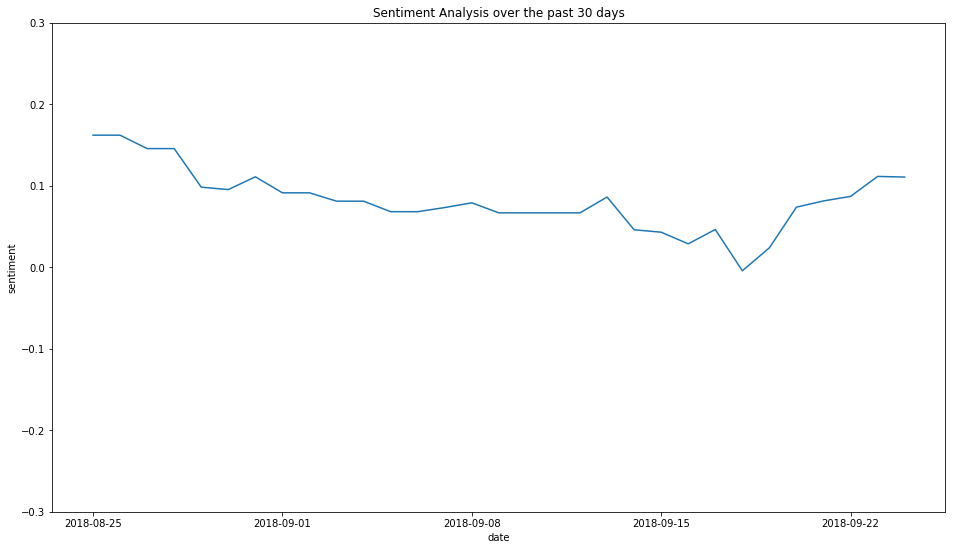

In [26]:
senty('Trump')

In [31]:
#Exploring the topics on the dip in sentiment day with Spacy
import spacy
from spacy import displacy


api_url_base = 'https://newsapi.org/v2/everything?'
topic = 'Trump'
startDate = '2018-09-18'

headers = {'q': topic, 'from': startDate, 'sortBy': 'popularity', 'apiKey': apiKey}

r = requests.get(api_url_base, headers)
x = r.json()
top_articles = pd.DataFrame(x['articles'])
toptext = pd.DataFrame.to_string(top_articles)

nlp = spacy.load('en')
doc = nlp(toptext)
displacy.render(doc, style = 'ent', jupyter = True)

2018-08-25
2018-08-26
2018-08-27
2018-08-28
2018-08-29
2018-08-30
2018-08-31
2018-09-01
2018-09-02
2018-09-03
2018-09-04
2018-09-05
2018-09-06
2018-09-07
2018-09-08
2018-09-09
2018-09-10
2018-09-11
2018-09-12
2018-09-13
2018-09-14
2018-09-15
2018-09-16
2018-09-17
2018-09-18
2018-09-19
2018-09-20
2018-09-21
2018-09-22
2018-09-23
2018-09-24
                 date  sentiment
2018-08-25 2018-08-25   0.143212
2018-08-26 2018-08-26   0.143212
2018-08-27 2018-08-27   0.143212
2018-08-28 2018-08-28   0.143212
2018-08-29 2018-08-29   0.143212
2018-08-30 2018-08-30   0.143212
2018-08-31 2018-08-31   0.128080
2018-09-01 2018-09-01   0.128080
2018-09-02 2018-09-02   0.128080
2018-09-03 2018-09-03   0.128080
2018-09-04 2018-09-04   0.128080
2018-09-05 2018-09-05   0.151448
2018-09-06 2018-09-06   0.176166
2018-09-07 2018-09-07   0.141275
2018-09-08 2018-09-08   0.141389
2018-09-09 2018-09-09   0.138479
2018-09-10 2018-09-10   0.138479
2018-09-11 2018-09-11   0.138479
2018-09-12 2018-09-12   0.138479

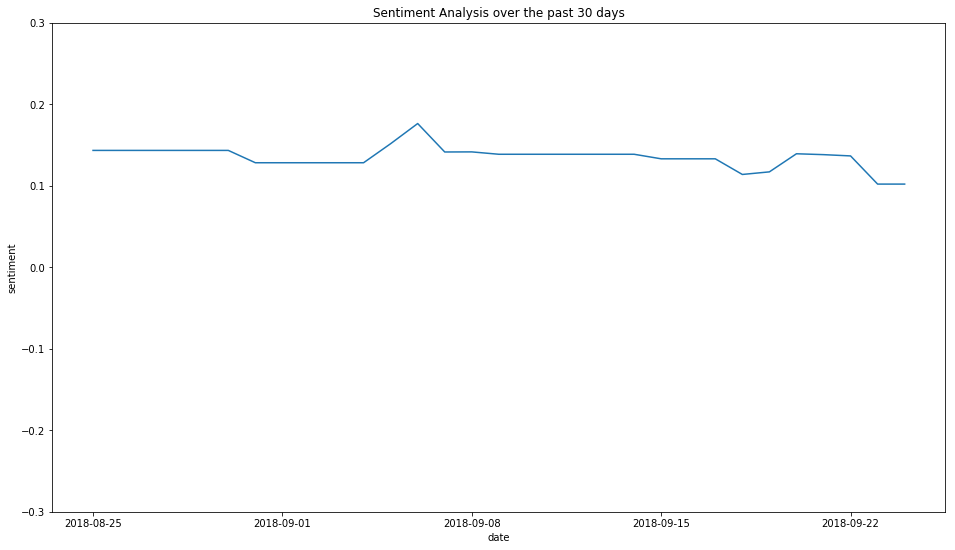

In [32]:
senty('kavanaugh')

2018-08-25
2018-08-26
2018-08-27
2018-08-28
2018-08-29
2018-08-30
2018-08-31
2018-09-01
2018-09-02
2018-09-03
2018-09-04
2018-09-05
2018-09-06
2018-09-07
2018-09-08
2018-09-09
2018-09-10
2018-09-11
2018-09-12
2018-09-13
2018-09-14
2018-09-15
2018-09-16
2018-09-17
2018-09-18
2018-09-19
2018-09-20
2018-09-21
2018-09-22
2018-09-23
2018-09-24
                 date  sentiment
2018-08-25 2018-08-25   0.198192
2018-08-26 2018-08-26   0.198192
2018-08-27 2018-08-27   0.198192
2018-08-28 2018-08-28   0.198192
2018-08-29 2018-08-29   0.198192
2018-08-30 2018-08-30   0.198192
2018-08-31 2018-08-31   0.198192
2018-09-01 2018-09-01   0.198192
2018-09-02 2018-09-02   0.198192
2018-09-03 2018-09-03   0.198192
2018-09-04 2018-09-04   0.198192
2018-09-05 2018-09-05   0.198192
2018-09-06 2018-09-06   0.198192
2018-09-07 2018-09-07   0.198192
2018-09-08 2018-09-08   0.198192
2018-09-09 2018-09-09   0.198192
2018-09-10 2018-09-10   0.198192
2018-09-11 2018-09-11   0.198192
2018-09-12 2018-09-12   0.198192

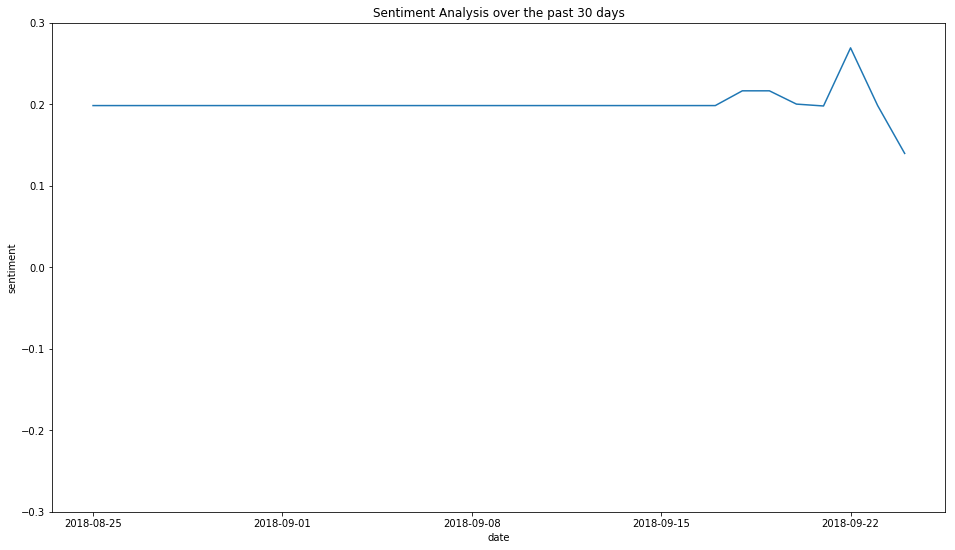

In [33]:
senty('Blasey Ford')

2018-08-25
2018-08-26
2018-08-27
2018-08-28
2018-08-29
2018-08-30
2018-08-31
2018-09-01
2018-09-02
2018-09-03
2018-09-04
2018-09-05
2018-09-06
2018-09-07
2018-09-08
2018-09-09
2018-09-10
2018-09-11
2018-09-12
2018-09-13
2018-09-14
2018-09-15
2018-09-16
2018-09-17
2018-09-18
2018-09-19
2018-09-20
2018-09-21
2018-09-22
2018-09-23
2018-09-24
                 date  sentiment
2018-08-25 2018-08-25   0.019758
2018-08-26 2018-08-26   0.050794
2018-08-27 2018-08-27   0.050794
2018-08-28 2018-08-28   0.073400
2018-08-29 2018-08-29   0.055067
2018-08-30 2018-08-30   0.055067
2018-08-31 2018-08-31   0.053291
2018-09-01 2018-09-01   0.109456
2018-09-02 2018-09-02   0.109456
2018-09-03 2018-09-03   0.109456
2018-09-04 2018-09-04   0.109456
2018-09-05 2018-09-05   0.092484
2018-09-06 2018-09-06   0.061469
2018-09-07 2018-09-07   0.061469
2018-09-08 2018-09-08   0.014226
2018-09-09 2018-09-09   0.014226
2018-09-10 2018-09-10   0.007465
2018-09-11 2018-09-11   0.007465
2018-09-12 2018-09-12   0.007465

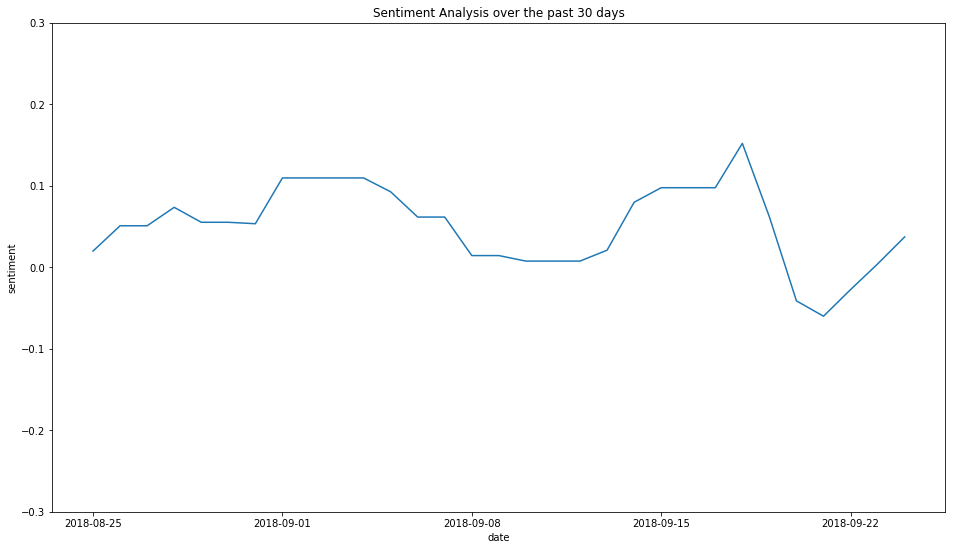

In [34]:
senty('baby killer')

2018-08-25
2018-08-26
2018-08-27
2018-08-28
2018-08-29
2018-08-30
2018-08-31
2018-09-01
2018-09-02
2018-09-03
2018-09-04
2018-09-05
2018-09-06
2018-09-07
2018-09-08
2018-09-09
2018-09-10
2018-09-11
2018-09-12
2018-09-13
2018-09-14
2018-09-15
2018-09-16
2018-09-17
2018-09-18
2018-09-19
2018-09-20
2018-09-21
2018-09-22
2018-09-23
2018-09-24
                 date  sentiment
2018-08-25 2018-08-25   0.030848
2018-08-26 2018-08-26   0.030848
2018-08-27 2018-08-27   0.030848
2018-08-28 2018-08-28   0.027996
2018-08-29 2018-08-29   0.073218
2018-08-30 2018-08-30   0.069365
2018-08-31 2018-08-31   0.069430
2018-09-01 2018-09-01   0.058809
2018-09-02 2018-09-02   0.081804
2018-09-03 2018-09-03   0.081804
2018-09-04 2018-09-04   0.082787
2018-09-05 2018-09-05   0.082787
2018-09-06 2018-09-06   0.065588
2018-09-07 2018-09-07   0.065588
2018-09-08 2018-09-08   0.036010
2018-09-09 2018-09-09   0.036933
2018-09-10 2018-09-10   0.029857
2018-09-11 2018-09-11   0.034396
2018-09-12 2018-09-12   0.033321

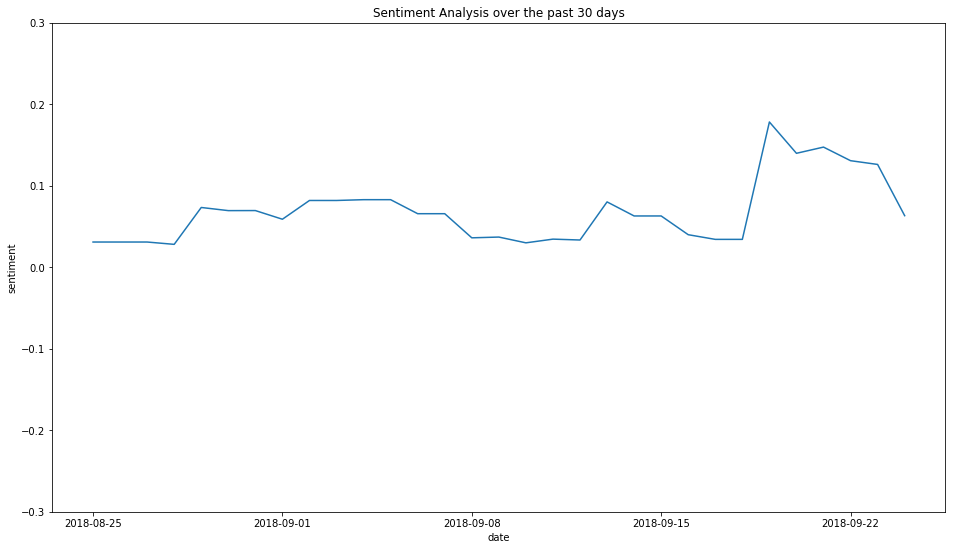

In [35]:
senty('Putin')